# Missing Value with Random simple imputer 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [68]:
df =pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [69]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [70]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [71]:
df.isnull().mean() *100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [72]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [73]:
X =df.drop(columns=['Survived'])
y=df['Survived']

In [74]:
X_train, X_test, y_train, y_test =train_test_split(X, y ,test_size=0.2, random_state=2)

In [75]:
X_train.head(1)

,Age,Fare
30,40.0,27.7208


In [76]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

In [77]:
X_train['Age_imputed'] =X_train['Age']
X_test['Age_imputed'] =X_test['Age']

In [78]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [79]:
# X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [80]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum(), random_state=42).values
)

X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum(), random_state=42).values
)


In [81]:
X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values

array([], dtype=float64)

In [82]:
X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum(), random_state=42).values


array([], dtype=float64)

In [83]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,18.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


C:\Users\Engineer\AppData\Local\Temp\ipykernel_9736\2447919383.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Orginal', hist=False)
C:\Users\Engineer\AppData\Local\Temp\ipykernel_9736\2447919383.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_t

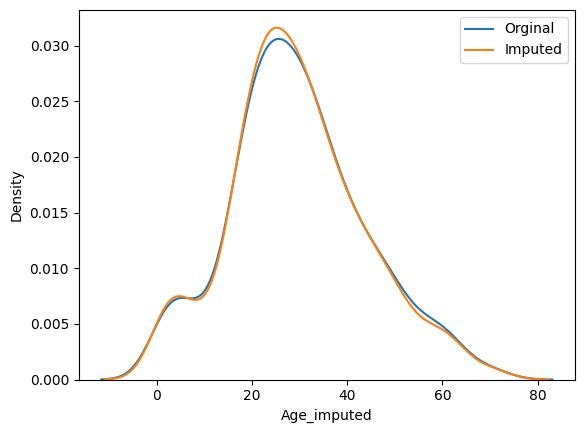

In [85]:
sns.distplot(X_train['Age'], label='Orginal', hist=False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)

plt.legend()
plt.show()

In [86]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  200.02896637747122


In [87]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.259863
Age,71.512440,204.349513,204.349513
Age_imputed,53.259863,204.349513,200.028966
